# Exploration of supply chain project

Possible Questions for the Project:

Are customers happier with digital products than with physical ones?

Are customers willing to switch to digital products from physical ones when they had a positive/negative experience

**Exploration of metadata (without Text Mining technics)**
Some ideas (from Maelys):

- Response rate, influence of brand or source, verified_purchase or not

- Distribution of scores.

- Influence of the marketplace or the company on the distribution of notes (hypothesis testin could be used for  this kind of analysis )

- Information about the 10 most active users, with a small analysis on it (distribution of scores, response rate, company...).

**Goal 2 Analysis of text (and cleaning if necessary ). You will need to complete the text mining module to be able to do this part.**
Some ideas :
- Analyze the punctuation according to the note

- Analyze the length of the text (nb character, nb words...) according to the note.

- Analyze the frequency of email addresses, links, phone numbers...

- Occurrence of words, wordcloud...

- N-gram

- Occurrence of some words : delivery order, return order, delivery, SAV, customer service...

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#first we import and concatenate the datafiles
data_hc = pd.read_csv(r"amazon_reviews_us_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
data_dc = pd.read_csv(r"amazon_reviews_us_Digital_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
data = pd.concat([data_hc,data_dc], axis = 0)

C:\Users\A9236\AppData\Local\Temp\ipykernel_8520\4256471888.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_hc = pd.read_csv(r"amazon_reviews_us_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'
C:\Users\A9236\AppData\Local\Temp\ipykernel_8520\4256471888.py:3: FutureWa

In [3]:
#the first few rows give us an overview if our prior steps went well and how the data looks like in general
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [4]:
#info gives us an overview of the types of the rows
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924992 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 235.0+ MB


In [5]:
#now we take a look at the amount of null-values per row.
print(data.isnull().sum(axis = 0))
#the amount is low compared to the total size of the dataset and it is likely that they are connected, so we can safely drop them
data = data.dropna(axis = 0)

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      30
review_body          61
review_date          30
dtype: int64


In [6]:
#First I will analyze each row and figure out it's meaning and data quality
print(data["marketplace"].value_counts())
#Only data from us marketplace, so we can drop the row
print("number of duplicated customer ids = ", len(data[data['customer_id'].duplicated() == True]))
#most likely because customers ordered multiple items
print("number of duplicated review ids = ", len(data[data['review_id'].duplicated() == True]))
#has to be 0 in order to ensure the ID is unique, i think we can drop this row as well in this case
#placeholder for code that shows if product_id, product_title and product_parent are fully correlated
print("product_category: ", data["product_category"].value_counts())
print("star rating: ", data["star_rating"].value_counts())
print("vines: ",data["vine"].value_counts())
print("verified_purchases: ",data["verified_purchase"].value_counts())

US    1924871
Name: marketplace, dtype: int64
number of duplicated customer ids =  798982
number of duplicated review ids =  0
product_category:  Video Games            1780154
Digital_Video_Games     144717
Name: product_category, dtype: int64
star rating:  5    1103331
4     337771
1     216459
3     165032
2     102278
Name: star_rating, dtype: int64
vines:  N    1920587
Y       4284
Name: vine, dtype: int64
verified_purchases:  Y    1288358
N     636513
Name: verified_purchase, dtype: int64


In [7]:
round(data.corr(),2)

,customer_id,product_parent,star_rating,helpful_votes,total_votes
customer_id,1.00,0.01,-0.05,0.05,0.05
product_parent,0.01,1.00,0.01,-0.00,-0.00
star_rating,-0.05,0.01,1.00,-0.05,-0.11
helpful_votes,0.05,-0.00,-0.05,1.00,0.95
total_votes,0.05,-0.00,-0.11,0.95,1.00


Here an overview of each row and it's meaning for further analysis:

**marketplace**: only US, so we can safely drop it

**customer_id**: not unique as some customers gave multiple reviews

**review_id**: unique and can therefore be dropped as we have an index for the data

**product_id**: says less about the product than its title, as the titles are good data we can drop this and keep the titles

**product_parent**: is fully dependent on product_id and title so it says nothing that adds to our analysis

**product_title**: says the most about the product that is rated and should be kept therefore

**product_category**: is either Digital_Video_Games or Video_Games and is used to seperate the two

**star_rating**: Value from 1-5 depending on how many stars the review gave the title

**helpful_votes**: how many customers rated the review as "helpful"

**total_votes**: how many votes the review recieved from custommers

**vine**: I have not figured this one out

**verified_purchase**: shows if the reviewer also purchased the product

**review_headline**: headline of the reiview, visible for everyone, therefore interessting what reviewers chose

**review_body**: the review itself

**review_date**: relevant for time related analysis

In [8]:
#now we will drop the rows we do not need for this analysis or our model
to_drop = ["marketplace", "review_id", "product_id", "product_parent"]
data = data.drop(to_drop, axis=1)

<AxesSubplot:xlabel='star_rating', ylabel='count'>

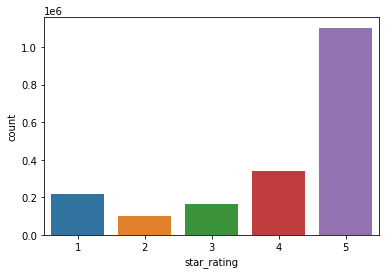

In [9]:
#lets look at the distribution of the star ratings for the reviews first
sns.countplot(x=data["star_rating"])

<AxesSubplot:>

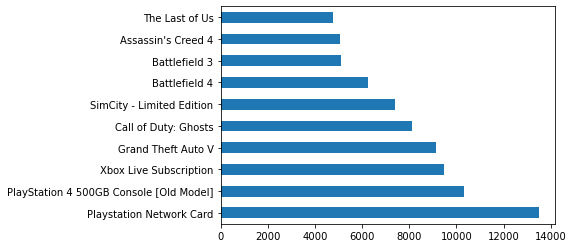

In [10]:
#Let's take a look at the 10 most rated titles
data["product_title"].value_counts().head(10).plot(kind="barh")

<AxesSubplot:ylabel='product_title'>

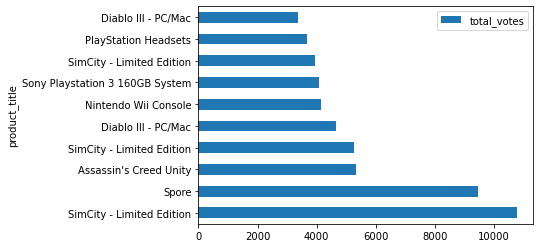

In [11]:
#lets look at the titles where the reviews recieved the most votes
data[["product_title", "total_votes"]].nlargest(10, ["total_votes"]).plot(x="product_title", y="total_votes", kind="barh")

<AxesSubplot:>

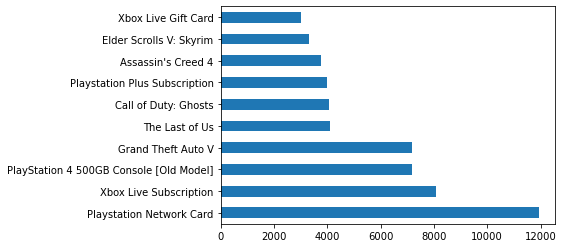

In [12]:
#now lets see which titles have the most 5-star reviews
data[data["star_rating"] == 5]["product_title"].value_counts().head(10).plot(kind="barh")
#interesting that in comparison to the most reviewed there are some changes in hiearchie when it comes to highest rated

<AxesSubplot:>

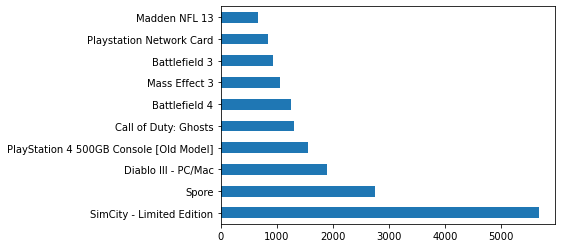

In [13]:
#let's look at the lowest rated reviews
data[data["star_rating"] == 1]["product_title"].value_counts().head(10).plot(kind="barh")
#that's where SimCity went, reviewers did not like this game at all

<AxesSubplot:ylabel='product_title'>

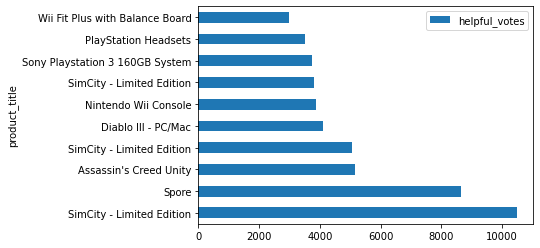

In [14]:
#let's look at which games had the most helpful reviews
data[["product_title", "helpful_votes"]].nlargest(10, ["helpful_votes"]).plot(x="product_title", y="helpful_votes", kind="barh")
#Customers found reviews of SimCity the most helpful allthough the game also had a lot of bad reviews. this again shows that this title was highly controversial

<AxesSubplot:xlabel='verified_purchase', ylabel='count'>

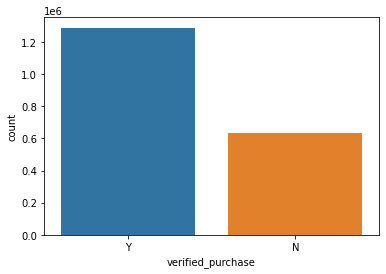

In [15]:
sns.countplot(x=data["verified_purchase"])
#there are a lot of non-verified purchases 
#let's look at how the rating distribution of these reviews looks like compared to the verified ones

<AxesSubplot:xlabel='star_rating', ylabel='count'>

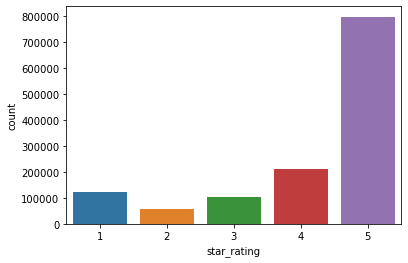

In [16]:
sns.countplot(x=data[data["verified_purchase"]=="Y"]["star_rating"])

<AxesSubplot:xlabel='star_rating', ylabel='count'>

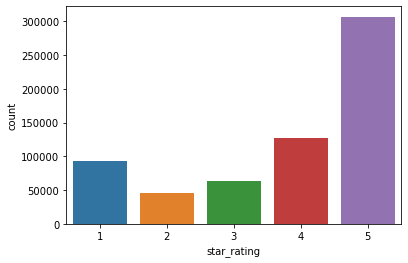

In [17]:
sns.countplot(x=data[data["verified_purchase"]=="N"]["star_rating"])
#there are a lot more lower ratings in comparison. 
#It is possible that customers were so unhappy, that they created a 2nd account just to review the game negatively again

<AxesSubplot:xlabel='product_category', ylabel='count'>

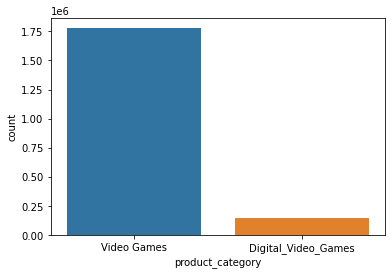

In [20]:
#are the reviews more positive for digital products or for hard copy ones?
sns.countplot(x=data["product_category"])

<AxesSubplot:xlabel='star_rating', ylabel='count'>

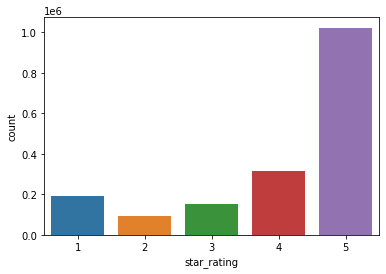

In [21]:
#there are definitely more hard-copy sales than digital sales, let's look at the ratings from the reviews for each one
sns.countplot(x=data[data["product_category"]=="Video Games"]["star_rating"])

<AxesSubplot:xlabel='star_rating', ylabel='count'>

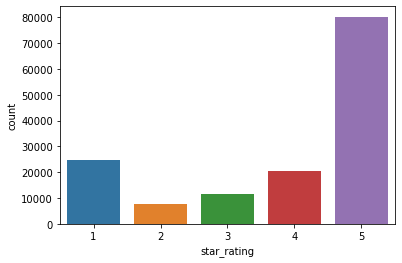

In [22]:
sns.countplot(x=data[data["product_category"]=="Digital_Video_Games"]["star_rating"])
#we can see from this simple analysis, that there are a lot more 1-star reviews for digital products

KeyError: 'star_rating'

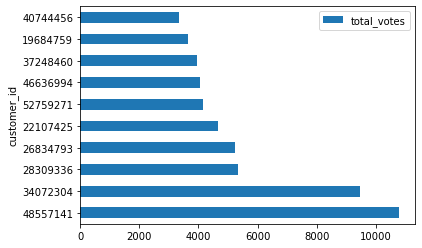

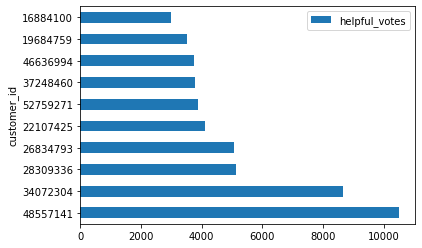

In [40]:
#now let's take a look at the reviewers, we take the thop 10 reviewers as a starting Point
data[["customer_id", "total_votes"]].nlargest(10, ["total_votes"]).plot(x="customer_id", y="total_votes", kind="barh")
data[["customer_id", "helpful_votes"]].nlargest(10, ["helpful_votes"]).plot(x="customer_id", y="helpful_votes", kind="barh")
#did not figure out the next one yet, how is the star rating distribution of the top 10 reviewers by review amount
sns.countplot(x=data["customer_id"].value_counts().nlargest(10)["star_rating"])
#same technique, how is the star rating distribution of the top 10 reviewers by helpful reviews amount

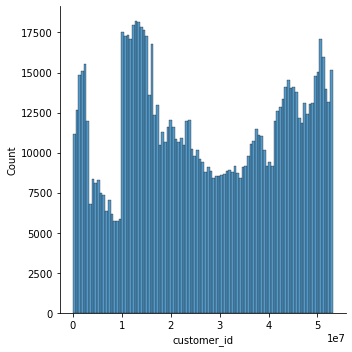

In [37]:
#here a look at the average distribution of the ratings per customer ID
sns.displot(data[["customer_id", "star_rating"]].groupby("customer_id").mean(), x='customer_id')

In [23]:
#I will use the sentiment detector from the exercise to figure out the sentiment of each title/comment combination
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
df = pd.read_csv("Sentiment Training.csv")
df.head(2)

,Unnamed: 0,Text,Sentiment
0,0,"Brokeback Mountain'is so beautiful, and so am...",1
1,1,I liked Harry Potter and I'll be sorry to see...,1


In [24]:
#here the training happens
from sklearn.model_selection import train_test_split
X = df["Text"]
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred) )
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual class'], colnames=['Predicted class'])
confusion_matrix

C:\Users\A9236\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


              precision    recall  f1-score   support

           0       0.91      0.98      0.94       128
           1       0.98      0.91      0.94       147

    accuracy                           0.94       275
   macro avg       0.94      0.94      0.94       275
weighted avg       0.94      0.94      0.94       275



C:\Users\A9236\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Predicted class,0,1
Actual class,,
0,125,3
1,13,134


In [27]:
#now I combine title and comment then tokenize them to prepare them for the prediction
predict_data = data.review_headline + data.review_body
tokenized_reviews = vectorizer.transform(predict_data)

In [28]:
#now we predict the sentiment and merge it to the original dataset
sentiment = clf.predict(tokenized_reviews.toarray())
data["sentiment"] = sentiment

MemoryError: Unable to allocate 13.1 GiB for an array with shape (1924871, 1828) and data type float32

In [1]:
#function for n-gram set-up
def generate_ngrams(text, WordsToCombine):
     words = text.split()
     output = []  
     for i in range(len(words)- WordsToCombine+1):
         output.append(words[i:i+WordsToCombine])
     return output

In [3]:
#example on how to use the function of nltk
import nltk
nltk.download('punkt')
from nltk.util import ngrams
 
samplText='this is a very good book to study'
NGRAMS=ngrams(sequence=nltk.word_tokenize(samplText), n=3)
for grams in NGRAMS:
    print(grams)

#create a word cloud from the n-grams?

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A9236\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


('this', 'is', 'a')
('is', 'a', 'very')
('a', 'very', 'good')
('very', 'good', 'book')
('good', 'book', 'to')
('book', 'to', 'study')
